In [ ]:
import networkx as nx
import pandas as pd
from community import community_louvain
import matplotlib.pyplot as plt

In [ ]:
edges = pd.read_csv('cora.cites', sep='\t', header=None, names=['source', 'target'])
nodes = pd.read_csv('cora.content', sep='\t', header=None, names=['paper_id', 'word_attributes', 'label'])

In [ ]:
G = nx.from_pandas_edgelist(edges, 'source', 'target')

In [ ]:
def draw_graph(G):
  pos = nx.spring_layout(G)
  nx.draw(G, pos, node_size=10, with_labels=False, edge_color="#CCCCCC", alpha=0.5)
  plt.show()

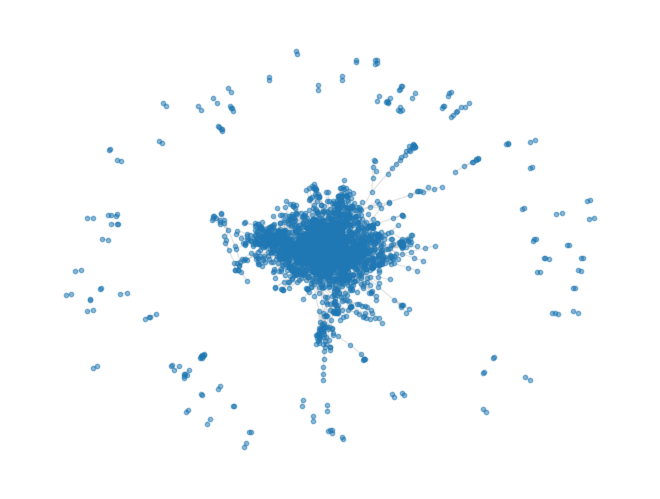

In [ ]:
draw_graph(G)

In [ ]:
partition = community_louvain.best_partition(G)

<ipython-input-7-7dd12e79b0de>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


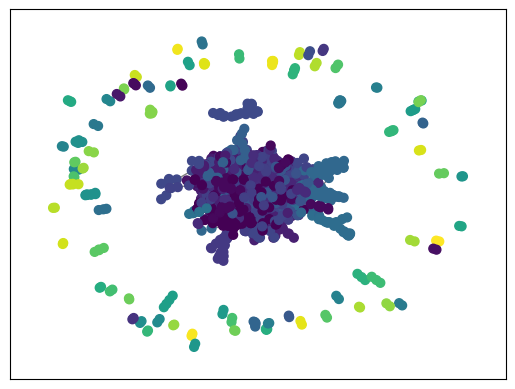

In [ ]:
pos = nx.spring_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

for comm_id, comm_nodes in communities.items():
    print(f"Community {comm_id}: {comm_nodes}")

Community 0: [35, 1033, 103515, 1050679, 1103960, 1103985, 1109199, 1112911, 1113438, 1113831, 1114331, 1117476, 1119505, 1119708, 1123756, 1127430, 1127913, 1128204, 1128227, 1128314, 1128453, 1128945, 1128985, 1129018, 1129027, 1129683, 1129778, 1130847, 1130856, 1131116, 1131360, 1131557, 1131752, 1133196, 1133338, 1136814, 1137466, 1152421, 1152508, 1153065, 1153280, 1153577, 1153853, 1153943, 1154176, 1154459, 116552, 128540, 132806, 141342, 141347, 148170, 15670, 1688, 178727, 18582, 190697, 190706, 197054, 198443, 206371, 210871, 229635, 231249, 248425, 254923, 259701, 259702, 263279, 263498, 273152, 287787, 28851, 289779, 289780, 289781, 307015, 335733, 33904, 33907, 35061, 38205, 387795, 415693, 41714, 427606, 44368, 45599, 46079, 486840, 48766, 503883, 503893, 513189, 54129, 54131, 561238, 568857, 573964, 573978, 574009, 574264, 574462, 575077, 575292, 575331, 576725, 576795, 577227, 578780, 579008, 592973, 593091, 593105, 593240, 593260, 593813, 594047, 594543, 594649, 59490

In [ ]:
modularity_score = community_louvain.modularity(partition, G)
print("Modularity:", modularity_score)

Modularity: 0.8120549548189957


In [ ]:
community_labels = nodes['label'].values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(community_labels)

In [ ]:
predicted_labels = np.array([partition[node] for node in sorted(partition.keys())])

In [ ]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

nmi_score = normalized_mutual_info_score(encoded_labels, predicted_labels)
ari_score = adjusted_rand_score(encoded_labels, predicted_labels)

print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Normalized Mutual Information (NMI): 0.0416
Adjusted Rand Index (ARI): -0.0011
